# Probability and Distributions

Based on: https://github.com/cs109/2015lab3/blob/master/Lab3-probability.ipynb

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print ("Throws:"," ".join(throws))
print ("Number of Heads:", np.sum(throws=='H'))
print ("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H T H T H T T H H H T H H H H T H T T T T H H H H T H H H H T H H H T H T H T T
Number of Heads: 24
p1 = Number of Heads/Total Throws: 0.6


C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(array([0.44, 0.46, 0.48, 0.5 , 0.52, 0.54]),
 <a list of 6 Text yticklabel objects>)

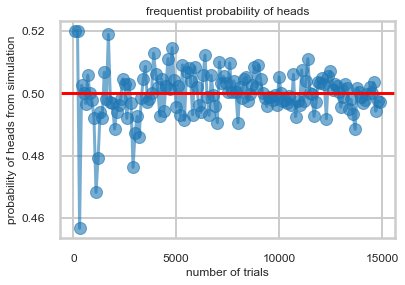

In [21]:
trials = np.arange(0,15000,100)
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);

plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials',fontsize =12);
plt.ylabel('probability of heads from simulation',fontsize =12);
plt.title('frequentist probability of heads',fontsize =12);
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)

### A simple election model

In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that PredictWise made on October 2, 2012 for the US presidential elections. PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [22]:
predictwise = pd.read_csv('2015lab3/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [27]:
reshape = predictwise.Obama.values.reshape(-1, 1)
reshape

array([[0.   ],
       [0.   ],
       [0.062],
       [0.   ],
       [1.   ],
       [0.807],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.72 ],
       [0.004],
       [1.   ],
       [0.   ],
       [1.   ],
       [0.036],
       [0.837],
       [0.   ],
       [0.   ],
       [0.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.987],
       [0.982],
       [0.   ],
       [0.074],
       [0.046],
       [0.   ],
       [0.851],
       [0.857],
       [0.998],
       [0.985],
       [1.   ],
       [0.349],
       [0.025],
       [0.89 ],
       [0.   ],
       [0.976],
       [0.978],
       [1.   ],
       [0.   ],
       [0.001],
       [0.001],
       [0.   ],
       [0.   ],
       [1.   ],
       [0.798],
       [0.999],
       [0.002],
       [0.925],
       [0.   ]])

In [30]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    return obama_votes.sum(axis=0)

In [33]:
result = simulate_election(predictwise, 10000)
print ((result >= 269).sum())

9963


In [41]:
result

array([322, 318, 347, ..., 318, 303, 338], dtype=int64)

In [94]:
def plot_simulation(simulation):
        with sns.axes_style('darkgrid'):
            plt.figure(figsize=(16,12))
            plt.hist((simulation), bins = np.arange(200,500,1),lw = 0, alpha=0.5, label = 'simulations', align = 'left', density = True)
            plt.axvline(332, 0, 0.5, color = 'r', label = 'actual')
            plt.axvline(269, 0, 0.5, color = 'k', label = 'victory')
            plt.axvline(simulation.mean(), 0, 0.5,color = 'b', label = 'mean')
            p05 = np.percentile(simulation, 5.)
            p95 = np.percentile(simulation, 95.)
            iq = int(p95-p05)
            pwin = ((simulation >=269).mean()*100)
            plt.title("chance of Obama victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
            plt.legend()
            plt.xlabel("Obama Electoral College Votes")
            plt.ylabel("Probability")

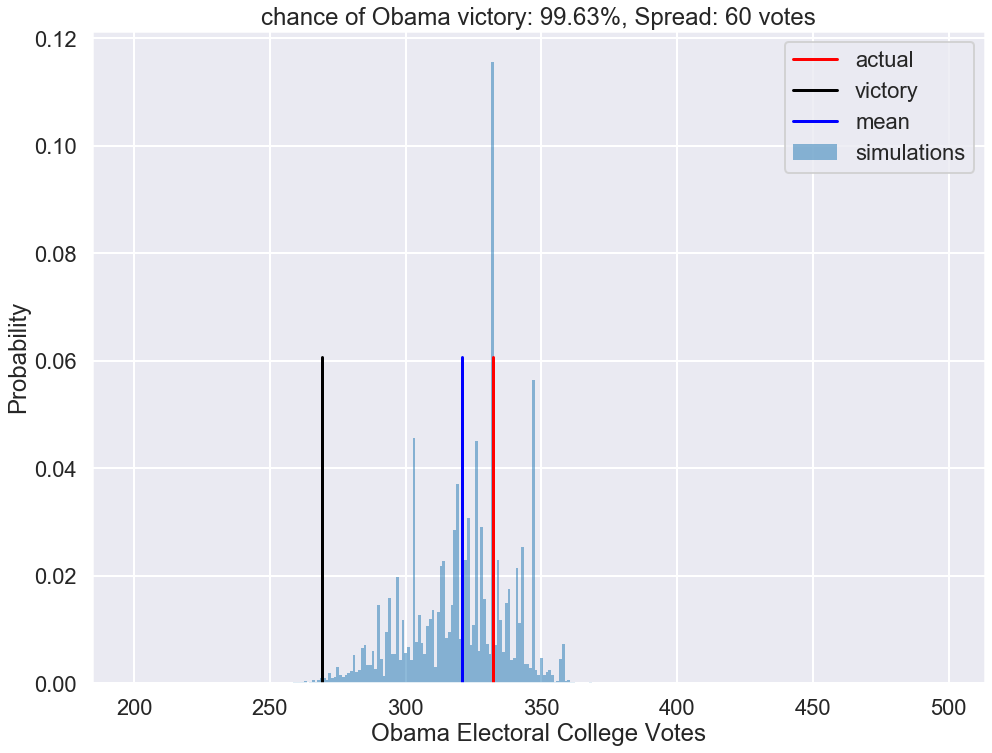

In [95]:
plot_simulation(result)

Matplotlib colours can be found here: https://matplotlib.org/2.0.2/api/colors_api.html